In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. Module 6.1.4
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
weather_api_key

'd848b8b2fadd5a7445befdcb5dcadbbc'

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | dinsor
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | strezhevoy
Processing Record 8 of Set 1 | luanda
Processing Record 9 of Set 1 | wanaka
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | cortez
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | pangody
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | mandalgovi
Processing Record 21 of Set 1 | saskylakh
Processing Record

Processing Record 34 of Set 4 | hamilton
Processing Record 35 of Set 4 | mar del plata
Processing Record 36 of Set 4 | severo-kurilsk
Processing Record 37 of Set 4 | ust-omchug
Processing Record 38 of Set 4 | mursan
Processing Record 39 of Set 4 | naze
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | puerto colombia
Processing Record 42 of Set 4 | pokosnoye
Processing Record 43 of Set 4 | solsvik
City not found. Skipping...
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | taltal
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | salamiyah
Processing Record 49 of Set 4 | mancio lima
Processing Record 50 of Set 4 | danielskuil
Processing Record 1 of Set 5 | voznesenye
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | rumonge
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | pochutla
Processing

Processing Record 29 of Set 8 | kichera
Processing Record 30 of Set 8 | san juan
Processing Record 31 of Set 8 | powell
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | phuket
Processing Record 34 of Set 8 | kitgum
Processing Record 35 of Set 8 | coihaique
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | mantua
Processing Record 38 of Set 8 | sawakin
Processing Record 39 of Set 8 | tisul
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 8 | zhangye
Processing Record 43 of Set 8 | banamba
Processing Record 44 of Set 8 | saint-louis
Processing Record 45 of Set 8 | dubbo
Processing Record 46 of Set 8 | seddon
Processing Record 47 of Set 8 | beringovskiy
Processing Record 48 of Set 8 | oranjemund
Processing Record 49 of Set 8 | jomalig
City not found. Skipping...
Processing Record 50 of Set 8 | arcata
Processing Record 1 of Set 9 | kutum
Processing Record 2 of 

Processing Record 17 of Set 12 | les cayes
Processing Record 18 of Set 12 | nefteyugansk
Processing Record 19 of Set 12 | goderich
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | artyk
City not found. Skipping...
Processing Record 22 of Set 12 | bilibino
Processing Record 23 of Set 12 | tubuala
Processing Record 24 of Set 12 | wanning
Processing Record 25 of Set 12 | adre
Processing Record 26 of Set 12 | panaba
Processing Record 27 of Set 12 | tazovskiy
Processing Record 28 of Set 12 | santa cruz
Processing Record 29 of Set 12 | boa vista
Processing Record 30 of Set 12 | pokaran
Processing Record 31 of Set 12 | ozgon
City not found. Skipping...
Processing Record 32 of Set 12 | porto-vecchio
Processing Record 33 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 34 of Set 12 | mbandaka
Processing Record 35 of Set 12 | vendas novas
Processing Record 36 of Set 12 | frunze
Processing Record 37 of Set 12 | mariental
Processing Record 38 of Set 12 | 

In [11]:
# Print the city count to confirm sufficient count
print(len(cities))

605


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,40.46,71,13,1.99,US,2021-12-26 19:27:33
1,Ushuaia,-54.8000,-68.3000,55.06,41,20,28.77,AR,2021-12-26 19:29:30
2,Mataura,-46.1927,168.8643,55.47,98,100,1.54,NZ,2021-12-26 19:29:30
3,Kodiak,57.7900,-152.4072,38.71,87,1,0.00,US,2021-12-26 19:25:02
4,Qaanaaq,77.4840,-69.3632,-2.60,97,100,1.74,GL,2021-12-26 19:29:30
5,Strezhevoy,60.7333,77.5889,-13.02,97,5,5.79,RU,2021-12-26 19:29:31
6,Luanda,-8.8368,13.2343,78.80,78,90,12.66,AO,2021-12-26 19:26:51
7,Wanaka,-44.7000,169.1500,57.11,86,100,7.00,NZ,2021-12-26 19:29:31
8,Road Town,18.4167,-64.6167,82.49,65,20,6.91,VG,2021-12-26 19:28:05
9,Cortez,37.3489,-108.5859,42.51,59,90,31.07,US,2021-12-26 19:29:32


In [13]:
city_data_df = city_data_df [["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-26 19:27:33,42.6001,-73.9662,40.46,71,13,1.99
1,Ushuaia,AR,2021-12-26 19:29:30,-54.8000,-68.3000,55.06,41,20,28.77
2,Mataura,NZ,2021-12-26 19:29:30,-46.1927,168.8643,55.47,98,100,1.54
3,Kodiak,US,2021-12-26 19:25:02,57.7900,-152.4072,38.71,87,1,0.00
4,Qaanaaq,GL,2021-12-26 19:29:30,77.4840,-69.3632,-2.60,97,100,1.74
5,Strezhevoy,RU,2021-12-26 19:29:31,60.7333,77.5889,-13.02,97,5,5.79
6,Luanda,AO,2021-12-26 19:26:51,-8.8368,13.2343,78.80,78,90,12.66
7,Wanaka,NZ,2021-12-26 19:29:31,-44.7000,169.1500,57.11,86,100,7.00
8,Road Town,VG,2021-12-26 19:28:05,18.4167,-64.6167,82.49,65,20,6.91
9,Cortez,US,2021-12-26 19:29:32,37.3489,-108.5859,42.51,59,90,31.07


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

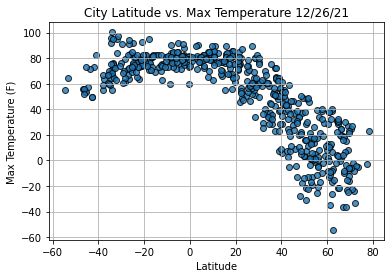

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

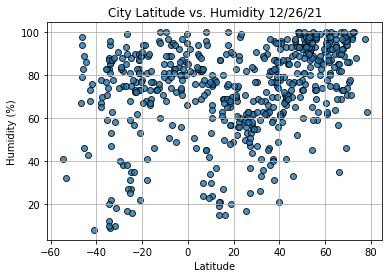

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

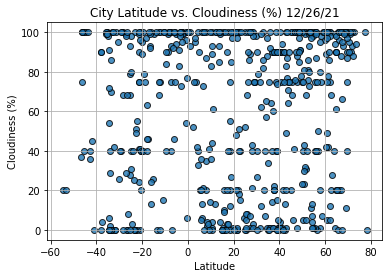

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

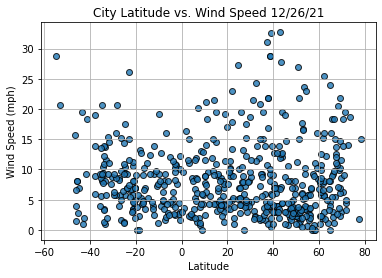

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
#Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-12-26 19:29:34
Lat                      -34.5322
Lng                       20.0403
Max Temp                    68.29
Humidity                       88
Cloudiness                     54
Wind Speed                  10.36
Name: 13, dtype: object

In [25]:
#We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
550     True
551     True
552     True
553     True
554    False
Name: Lat, Length: 555, dtype: bool

In [26]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-26 19:27:33,42.6001,-73.9662,40.46,71,13,1.99
3,Kodiak,US,2021-12-26 19:25:02,57.7900,-152.4072,38.71,87,1,0.00
4,Qaanaaq,GL,2021-12-26 19:29:30,77.4840,-69.3632,-2.60,97,100,1.74
5,Strezhevoy,RU,2021-12-26 19:29:31,60.7333,77.5889,-13.02,97,5,5.79
8,Road Town,VG,2021-12-26 19:28:05,18.4167,-64.6167,82.49,65,20,6.91
...,...,...,...,...,...,...,...,...,...
549,Qostanay,KZ,2021-12-26 19:43:27,53.1667,63.5833,6.01,80,100,16.58
550,Belogorsk,RU,2021-12-26 19:43:28,50.9158,128.4611,-30.77,100,43,3.83
551,Sayat,TM,2021-12-26 19:44:28,38.7839,63.8803,22.87,70,0,4.63
552,Iqaluit,CA,2021-12-26 19:44:28,63.7506,-68.5145,-2.31,84,40,5.01


In [28]:
#Also, since this is a DataFrame, we can add the head() method at the end to get the first five rows, not counting the row of column headings.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-26 19:27:33,42.6001,-73.9662,40.46,71,13,1.99
3,Kodiak,US,2021-12-26 19:25:02,57.7900,-152.4072,38.71,87,1,0.00
4,Qaanaaq,GL,2021-12-26 19:29:30,77.4840,-69.3632,-2.60,97,100,1.74
5,Strezhevoy,RU,2021-12-26 19:29:31,60.7333,77.5889,-13.02,97,5,5.79
8,Road Town,VG,2021-12-26 19:28:05,18.4167,-64.6167,82.49,65,20,6.91


In [40]:
#Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
#We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.
#To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

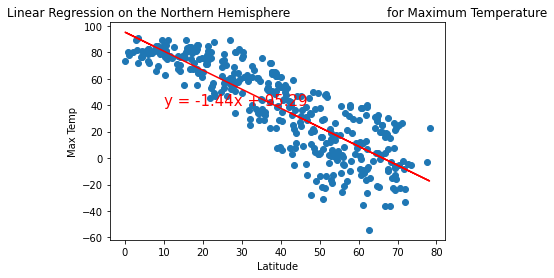

In [41]:
#To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.
#Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

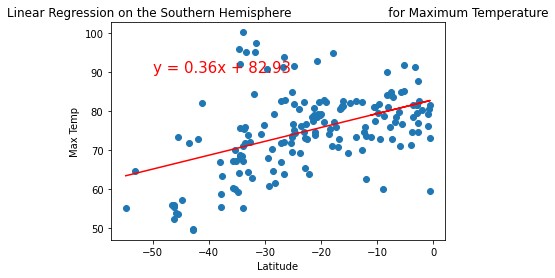

In [48]:
#To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.
#Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Findings- 
#The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots.

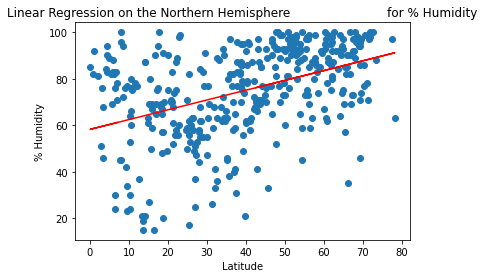

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

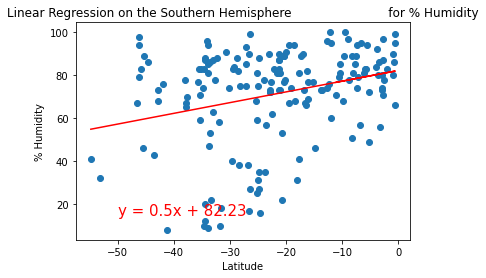

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

#Findings--->The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

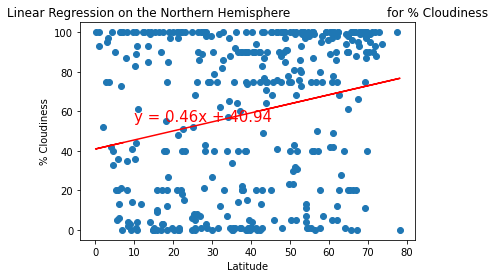

In [57]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

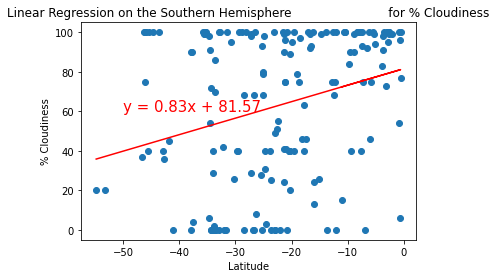

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
#Findings----->The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

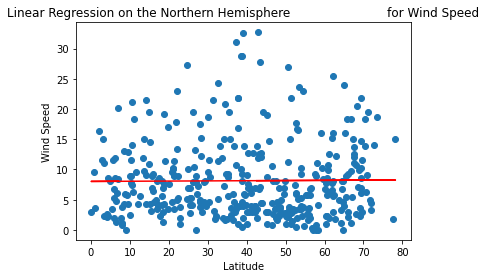

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

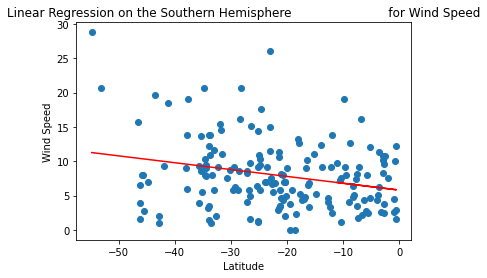

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
#The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots.